# For Text Mining assignment
 
 ONE:
1) Perform sentimental analysis on the Elon-musk tweets (Exlon-musk.csv)


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import nltk
nltk.download('stopwords') 
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from textblob import TextBlob
%matplotlib inline

import warnings 
warnings.filterwarnings('ignore')

import re
import string

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
import chardet

# Detect the encoding of a CSV file
with open('Elon_musk.csv', 'rb') as f:
    result = chardet.detect(f.read())

print(result['encoding'])

Windows-1252


In [3]:
data=pd.read_csv("Elon_musk.csv",encoding='Windows-1252')
data

,Unnamed: 0,Text
0,1,@kunalb11 I’m an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [4]:
data.shape

(1999, 2)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1999 non-null   int64 
 1   Text        1999 non-null   object
dtypes: int64(1), object(1)
memory usage: 31.4+ KB


In [6]:
data.drop(['Unnamed: 0'], inplace= True, axis= 1)
data

,Text
0,@kunalb11 I’m an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...
...,...
1994,"@flcnhvy True, it sounds so surreal, but the n..."
1995,@PPathole Make sure to read ur terms &amp; con...
1996,@TeslaGong @PPathole Samwise Gamgee
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...


# EDA

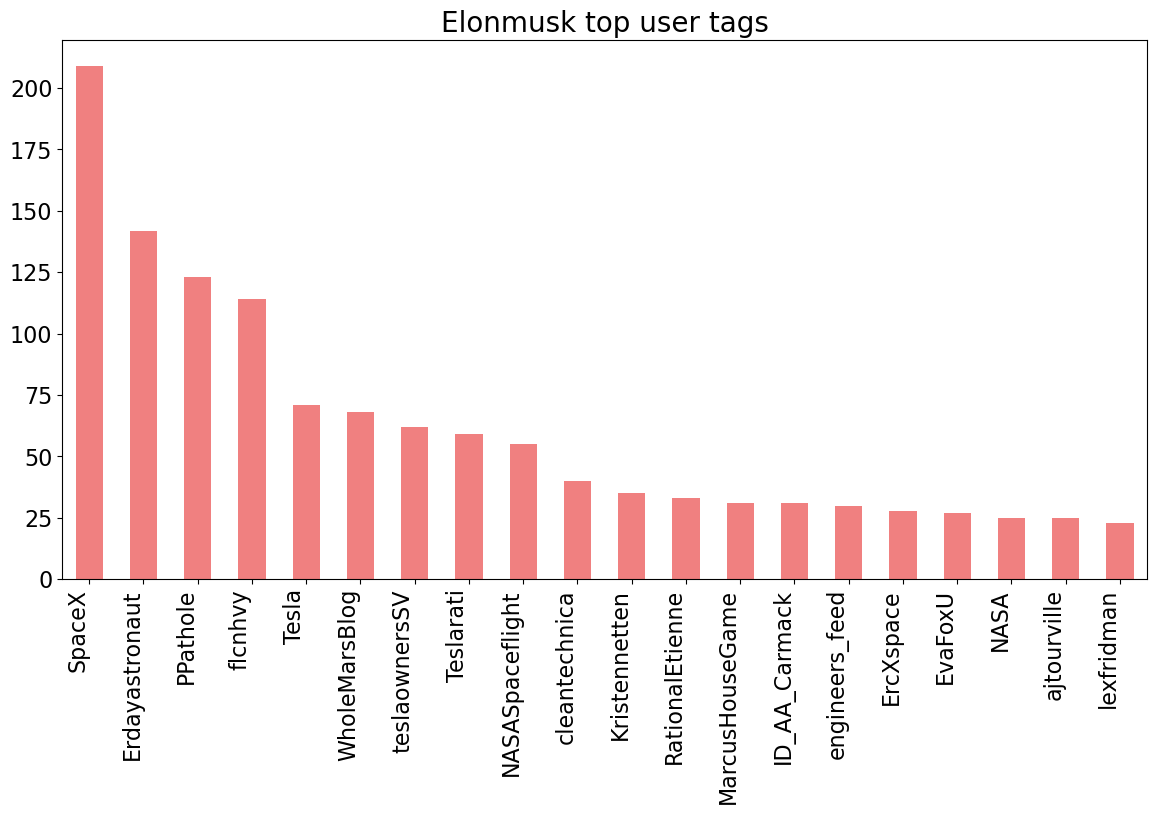

In [7]:
import itertools

c = list(itertools.chain(*data.Text.map(lambda t: [handle.replace(":", "")[1:] for handle in t.split(" ")
                                                     if '@' in handle.replace(":", "")]).tolist()))

pd.Series(c).value_counts().head(20).plot.bar(figsize=(14, 7), fontsize=16, color='lightcoral')
plt.gca().set_title('Elonmusk top user tags', fontsize=20)
plt.gca().set_xticklabels(plt.gca().get_xticklabels(), rotation=90, ha='right', fontsize=16)
pass

In [8]:
# Cleaning the text by removing irrelevant information

def clean_text(text):
  text=text.lower()
  text=re.sub('\[.*?\]','',text)
  text= re.sub('[%s]' % re.escape(string.punctuation), '', text)
  text = re.sub('\w*\d\w*', '', text)
  text = re.sub("[0-9" "]+"," ",text)
  text = re.sub('[‘’“”…]', '', text)
  return text

clean = lambda x: clean_text(x)

data["Text"] = data["Text"].apply(clean_text) # Clean The Text
data.head(10)

,Text
0,im an alien
1,idaacarmack ray tracing on cyberpunk with hdr ...
2,joerogan spotify great interview
3,doge is underestimated
4,teslacn congratulations tesla china for amazin...
5,happy new year of the ox
6,frodo was the underdoge\nall thought he would ...
7,owensparks flcnhvy haha thanks
8,flcnhvy indeed tweets definitely do not repre...
9,the most entertaining outcome is the most likely


In [9]:
freq = pd.Series(' '.join(data['Text']).split()).value_counts()[:20] # for top 20
freq

the               487
to                400
a                 356
is                355
of                315
spacex            239
in                219
amp               218
for               194
tesla             166
will              165
be                157
erdayastronaut    142
this              140
it                138
we                136
on                129
that              128
rt                127
but               126
Name: count, dtype: int64

In [10]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stop=stopwords.words('english')
data['Text'] = data['Text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [11]:
#Word Frequency after Removal of Stopwords

freq_stp = pd.Series(' '.join(data['Text']).split()).value_counts()[:20] # for top 20
freq_stp

spacex             239
amp                218
tesla              166
erdayastronaut     142
rt                 127
ppathole           123
flcnhvy            114
yes                 86
great               76
teslaownerssv       73
wholemarsblog       68
teslarati           59
nasaspaceflight     55
haha                55
good                51
launch              49
sure                43
yeah                41
cleantechnica       40
would               40
Name: count, dtype: int64

# Basic Feature Extaction

In [13]:
vectorizer = CountVectorizer(min_df = 1, max_df = 0.9)
X = vectorizer.fit_transform(data["Text"])
word_freq_df = pd.DataFrame({'term': vectorizer.get_feature_names_out(), 'occurrences':np.asarray(X.sum(axis=0)).ravel().tolist()})
word_freq_df['frequency'] = word_freq_df['occurrences']/np.sum(word_freq_df['occurrences'])
word_freq_df.head(11)

,term,occurrences,frequency
0,aber,1,0.000076
1,able,6,0.000453
2,abo,1,0.000076
3,aboard,1,0.000076
4,abort,3,0.000227
5,absence,1,0.000076
6,absolute,1,0.000076
7,absolutely,15,0.001133
8,absorb,1,0.000076
9,absorption,1,0.000076


In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features= 1000, max_df = 0.5, smooth_idf=True) #keep top 1000 words
doc_vec = vectorizer.fit_transform(data["Text"])
names_features = vectorizer.get_feature_names_out()
dense = doc_vec.todense()
denselist = dense.tolist()
df = pd.DataFrame(denselist, columns = names_features)
df

,able,abort,absolutely,access,accurate,actual,actually,adamklotz,add,adding,...,yeah,year,years,yes,yesterdays,youre,yourfavgas,yup,zero,zone
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.356742,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Getting subjectivity and polarity

In [15]:
#Create a function to get the subjectivity

def getSubjectivity(twt):
  return TextBlob(twt).sentiment.subjectivity


#Create a function to get the polarity

def getPolarity(twt):
  return TextBlob(twt).sentiment.polarity

In [16]:
#Create two new columns to save the results of the created functions 

data['Subjectivity'] = data['Text'].apply(getSubjectivity)
data['Polarity'] = data['Text'].apply(getPolarity)

In [17]:
data.head

<bound method NDFrame.head of                                                    Text  Subjectivity  \
0                                              im alien      0.750000   
1     idaacarmack ray tracing cyberpunk hdr nextleve...      0.000000   
2                      joerogan spotify great interview      0.750000   
3                                   doge underestimated      0.000000   
4     teslacn congratulations tesla china amazing ex...      0.322222   
...                                                 ...           ...   
1994  flcnhvy true sounds surreal negative propagand...      0.508333   
1995  ppathole make sure read ur terms amp condition...      0.888889   
1996                  teslagong ppathole samwise gamgee      0.000000   
1997                         ppathole altho dumb dumber      0.500000   
1998                             progress update august      0.000000   

      Polarity  
0    -0.250000  
1     0.000000  
2     0.800000  
3     0.000000  
4     0.

In [18]:
# Creating a function to classify or label the sentiments as negative, positive and neutral

def getSentiment(value):
  if value < 0:
    return 'Negative'
  elif value > 0:
    return 'Positive'
  else:
    return 'Neutral'

In [19]:
# Create a new column 'Sentiment'

data['Sentiment'] = data['Polarity'].apply(getSentiment)

In [20]:
data

,Text,Subjectivity,Polarity,Sentiment
0,im alien,0.750000,-0.250000,Negative
1,idaacarmack ray tracing cyberpunk hdr nextleve...,0.000000,0.000000,Neutral
2,joerogan spotify great interview,0.750000,0.800000,Positive
3,doge underestimated,0.000000,0.000000,Neutral
4,teslacn congratulations tesla china amazing ex...,0.322222,0.200000,Positive
...,...,...,...,...
1994,flcnhvy true sounds surreal negative propagand...,0.508333,0.111111,Positive
1995,ppathole make sure read ur terms amp condition...,0.888889,0.500000,Positive
1996,teslagong ppathole samwise gamgee,0.000000,0.000000,Neutral
1997,ppathole altho dumb dumber,0.500000,-0.375000,Negative


# Visualizations

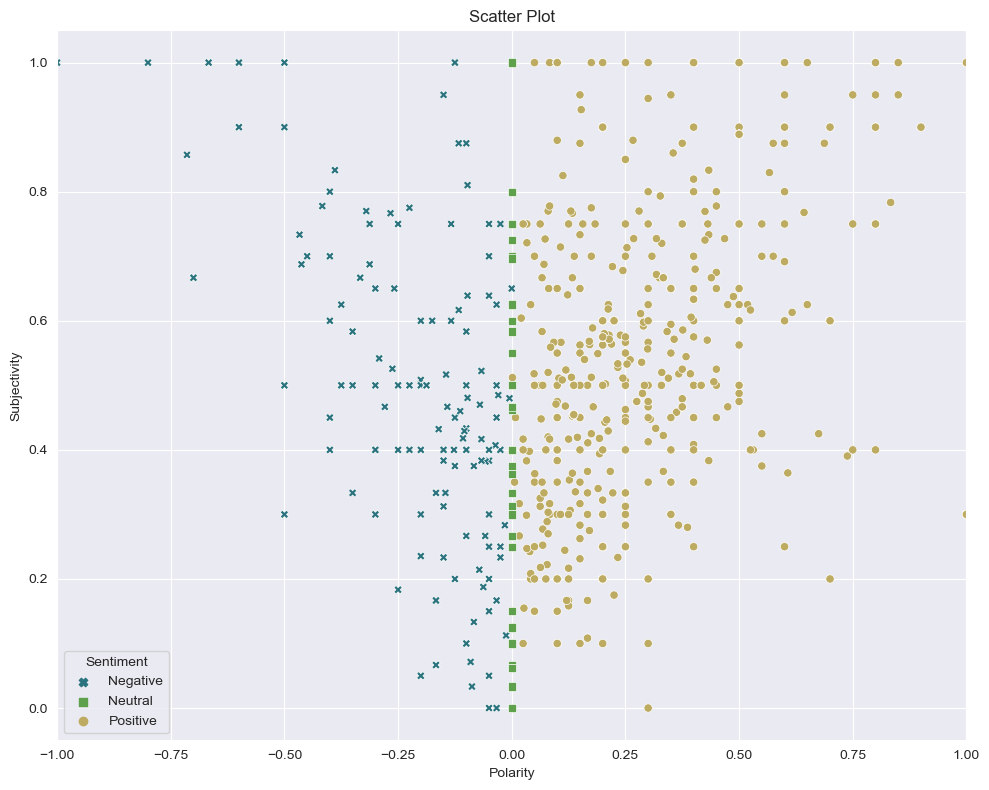

In [21]:
# Create scatter plot

sns.set_style('darkgrid')
plt.figure(figsize = (10,8))

markers = {'Positive':'o', 'Neutral':'s','Negative':'X'}

sns.scatterplot(data=data, x='Polarity', y='Subjectivity', hue = 'Sentiment', style = 'Sentiment', markers = markers, palette = 'gist_earth').set(xlim=(-1,1))
plt.title('Scatter Plot')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')

plt.tight_layout()

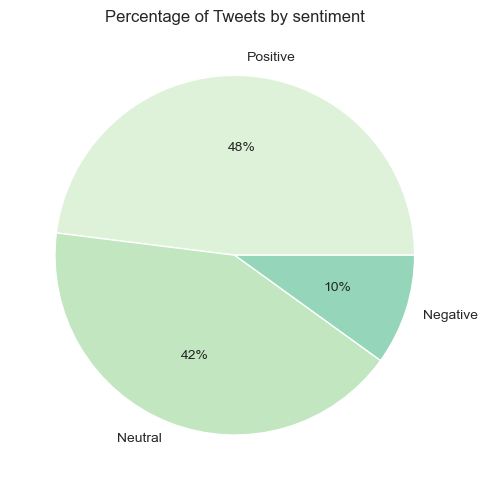

In [22]:
plt.figure(figsize = (10, 5))

data = data['Sentiment'].value_counts()
colors = sns.color_palette('GnBu')
labels = ['Positive', 'Neutral', 'Negative']

plt.pie(data, labels = labels, autopct = '%.0f%%', colors = colors)
plt.title('Percentage of Tweets by sentiment')

plt.tight_layout()

# According to the data, most of Elon Musk's tweets are highly subjective and are perceived as positive or neutral.